#                                    SURVIVAL ON TITANIC PREDICTION PROJECT


In [2]:
# Importing necessary libraries
import numpy as np  # NumPy for numerical operations
import matplotlib.pyplot as plt  # Matplotlib for data visualization
import pandas as pd  # Pandas for data manipulation and analysis
import seaborn as sns  # Seaborn for statistical data visualization
from pandas import DataFrame  # Importing DataFrame from pandas for easy data handling
%matplotlib inline

In [3]:
# Importing the Pandas library to read the Titanic training dataset from the provided URL
df= pd.read_csv("https://raw.githubusercontent.com/dsrscientist/dataset1/master/titanic_train.csv")

In [4]:
df

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


# DataFrame Information:

- The dataset consists of 891 entries and 12 columns.
- The columns include 'PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp', 'Parch', 'Ticket', 'Fare', 'Cabin', and 'Embarked'.

# Data Types:

- Integer data types: 'PassengerId', 'Survived', 'Pclass', 'SibSp', 'Parch'
- Float data types: 'Age', 'Fare'
- Object data types: 'Name', 'Sex', 'Ticket', 'Cabin', 'Embarked'

# Missing Values:

- 'Age' column has 177 missing values.
- 'Cabin' column has 687 missing values.
- 'Embarked' column has 2 missing values.

# Observations:

- 'Survived' is binary (0 or 1), indicating whether a passenger survived or not.
- 'Pclass' represents the passenger class (1st, 2nd, or 3rd).
- 'Age' has missing values that may need to be addressed.
- 'Cabin' has a significant number of missing values.
- 'Embarked' has a couple of missing values.
- Further exploration and preprocessing may be needed based on these initial observations.

# HANDLING MISSING VALUES

In [6]:
# Checking for missing values before handling them
print("Missing values before handling:")
print(df.isnull().sum())

# Filling missing values in the 'Age' column with the median
df['Age'].fillna(df['Age'].median(), inplace=True)

# Filling missing values in the 'Cabin' column with a placeholder value (assuming it's a categorical column)
df['Cabin'].fillna('Unknown', inplace=True)

# Filling missing values in the 'Embarked' column with the mode
df['Embarked'].fillna(df['Embarked'].mode()[0], inplace=True)

# Checking for missing values after handling them
print("\nMissing values after handling:")
print(df.isnull().sum())

Missing values before handling:
PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

Missing values after handling:
PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Cabin          0
Embarked       0
dtype: int64


**All missing values in the dataset have been successfully handled.**

In [7]:
# Display the number of unique values for each column in the DataFrame
df.nunique()

PassengerId    891
Survived         2
Pclass           3
Name           891
Sex              2
Age             88
SibSp            7
Parch            7
Ticket         681
Fare           248
Cabin          148
Embarked         3
dtype: int64

Observations on the Number of Unique Values for Each Column:

- **PassengerId:** There are 891 unique passenger IDs, indicating that each passenger has a distinct identifier.
  
- **Survived:** There are 2 unique values, suggesting this is likely a binary column indicating survival (0 or 1).

- **Pclass:** There are 3 unique values, representing the passenger class (1st, 2nd, or 3rd).

- **Name:** There are 891 unique names, indicating each passenger has a unique identifier. This may be useful for identification purposes.

- **Sex:** There are 2 unique values, likely representing the gender of passengers (e.g., 'male' and 'female').

- **Age:** There are 88 unique values, suggesting a range of ages among the passengers.

- **SibSp:** There are 7 unique values, representing the number of siblings/spouses aboard.

- **Parch:** There are 7 unique values, representing the number of parents/children aboard.

- **Ticket:** There are 681 unique values for tickets, indicating some passengers may share the same ticket number.

- **Fare:** There are 248 unique values for fares, indicating a range of prices paid by passengers.

- **Cabin:** There are 148 unique values for cabins, suggesting that some passengers may share the same cabin.

- **Embarked:** There are 3 unique values, likely representing the port of embarkation (e.g., 'C', 'Q', 'S').

In [8]:
# Displaying a statistical summary of numerical columns in the DataFrame using df.describe()

df.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.361582,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,13.019697,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,22.000000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,35.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


This summary provides insights into the central tendency, spread, and distribution of selected numerical features in the dataset.

In [9]:
# Calculating the skewness of each numerical column in the DataFrame using df.skew()
# Selecting only numeric columns for skewness calculation
numeric_columns = df.select_dtypes(include=np.number)

# Calculating skewness for numeric columns
skewness = numeric_columns.skew()

# Displaying the skewness values
print(skewness)

PassengerId    0.000000
Survived       0.478523
Pclass        -0.630548
Age            0.510245
SibSp          3.695352
Parch          2.749117
Fare           4.787317
dtype: float64


Observations on Skewness of Numerical Columns:

- **PassengerId:** Skewness close to 0 (0.000) indicates a relatively symmetrical distribution of passenger IDs.

- **Survived:** A positive skewness of approximately 0.48 suggests a rightward skew, indicating a concentration of passengers who did not survive (1).

- **Pclass:** A negative skewness of approximately -0.63 indicates a leftward skew, suggesting a concentration towards higher passenger classes (1st class).

- **Age:** A positive skewness of approximately 0.51 indicates a rightward skew, suggesting a concentration of younger passengers.

- **SibSp:** A significantly positive skewness of approximately 3.70 indicates a pronounced rightward skew, suggesting a concentration of passengers with fewer siblings or spouses.

- **Parch:** A positive skewness of approximately 2.75 indicates a rightward skew, suggesting a concentration of passengers with fewer parents or children.

- **Fare:** A strongly positive skewness of approximately 4.79 indicates a rightward skew, suggesting a concentration of lower fares with a tail extending towards higher fares.

# DATA VISUALIZATION

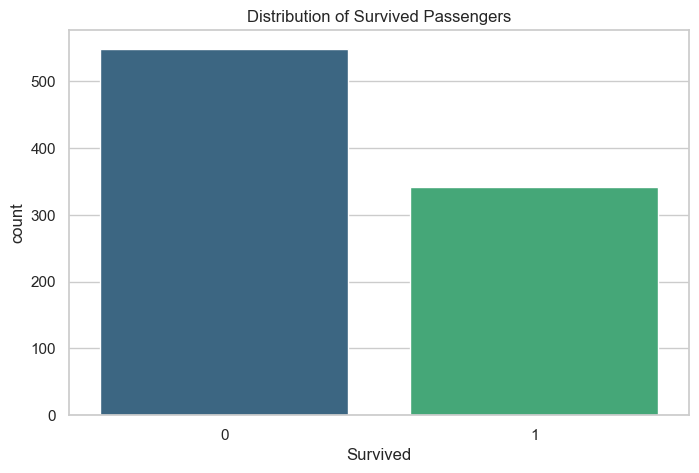

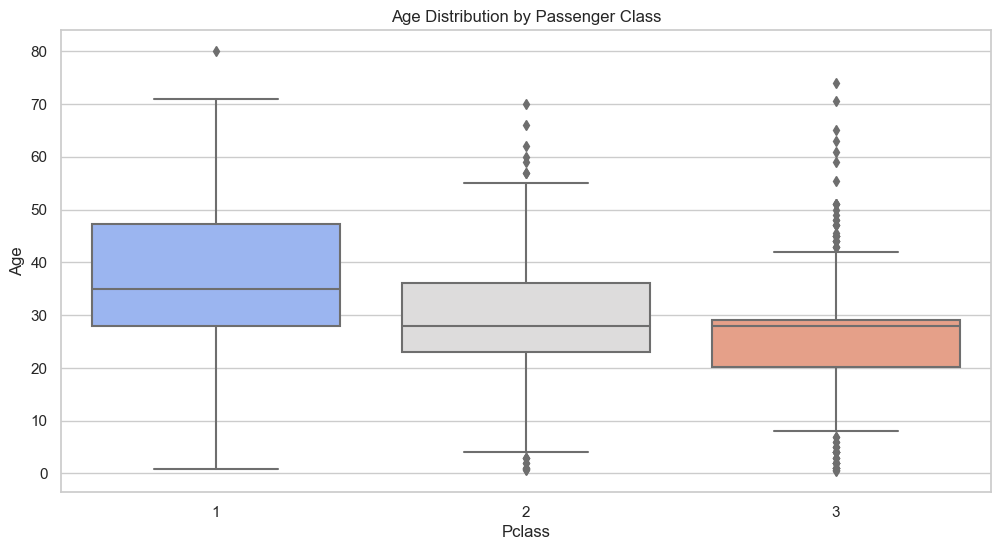

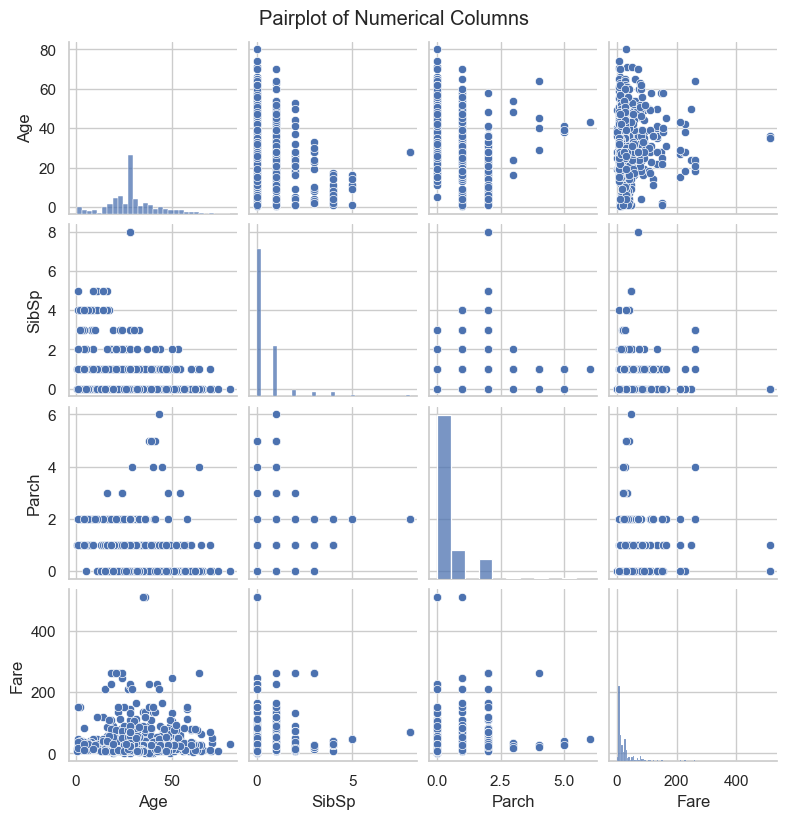

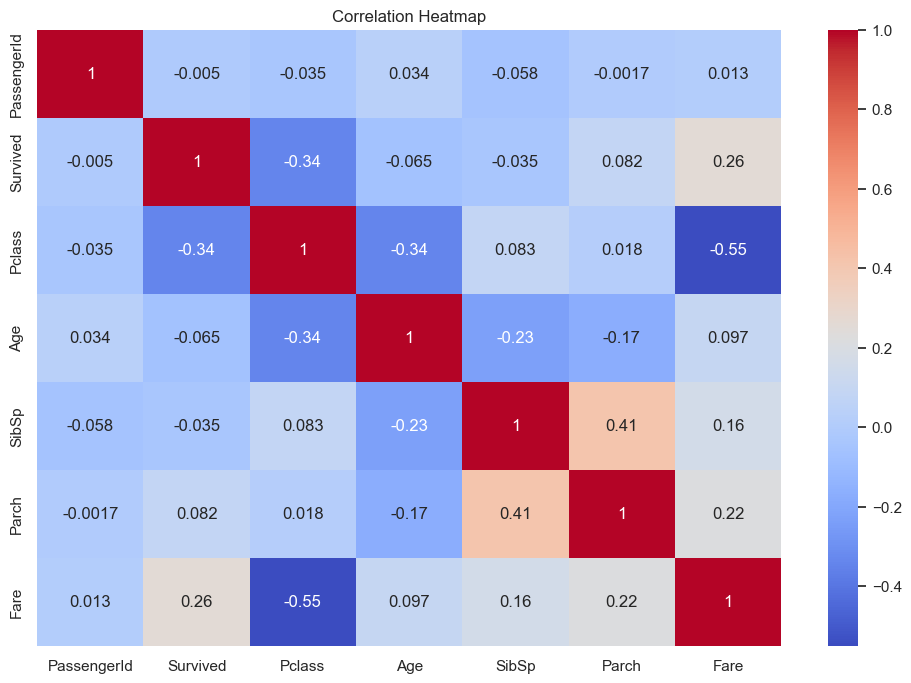

In [11]:
# Setting the style for Seaborn
sns.set(style="whitegrid")

# Visualization 1: Countplot for 'Survived'
plt.figure(figsize=(8, 5))
sns.countplot(x='Survived', data=df, palette='viridis')
plt.title('Distribution of Survived Passengers')
plt.show()

# Visualization 2: Boxplot for 'Age' and 'Pclass'
plt.figure(figsize=(12, 6))
sns.boxplot(x='Pclass', y='Age', data=df, palette='coolwarm')
plt.title('Age Distribution by Passenger Class')
plt.show()

# Visualization 3: Pairplot for selected numerical columns
numerical_columns = ['Age', 'SibSp', 'Parch', 'Fare']
sns.pairplot(df[numerical_columns], height=2, kind='scatter', palette='muted')
plt.suptitle('Pairplot of Numerical Columns', y=1.02)
plt.show()

# Visualization 4: Correlation Heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(df.corr(), annot=True, cmap='coolwarm')
plt.title('Correlation Heatmap')
plt.show()

# DATA ANALYSIS

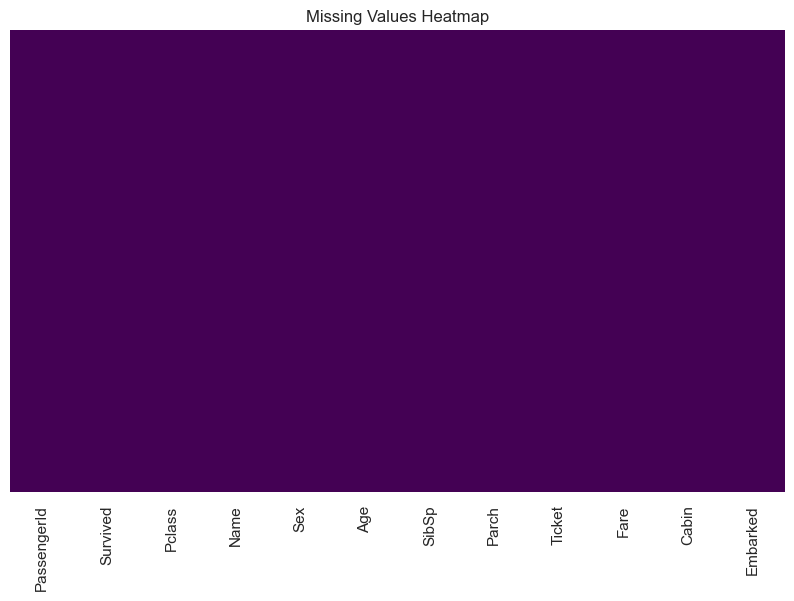

In [19]:
# Visualizing missing values
plt.figure(figsize=(10, 6))
sns.heatmap(df.isnull(), cmap='viridis', cbar=False, yticklabels=False)
plt.title('Missing Values Heatmap')
plt.show()

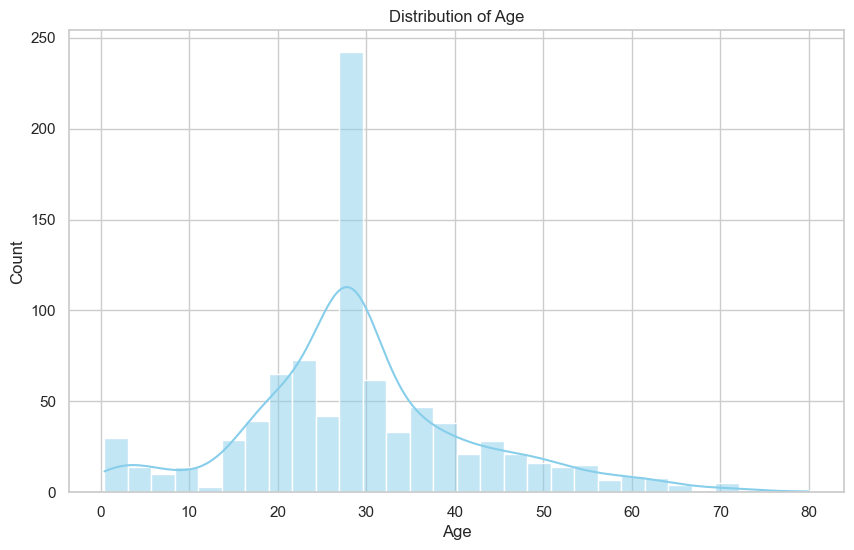

In [20]:
# Visualizing the distribution of 'Age' with a histogram
plt.figure(figsize=(10, 6))
sns.histplot(df['Age'].dropna(), bins=30, kde=True, color='skyblue')
plt.title('Distribution of Age')
plt.show()

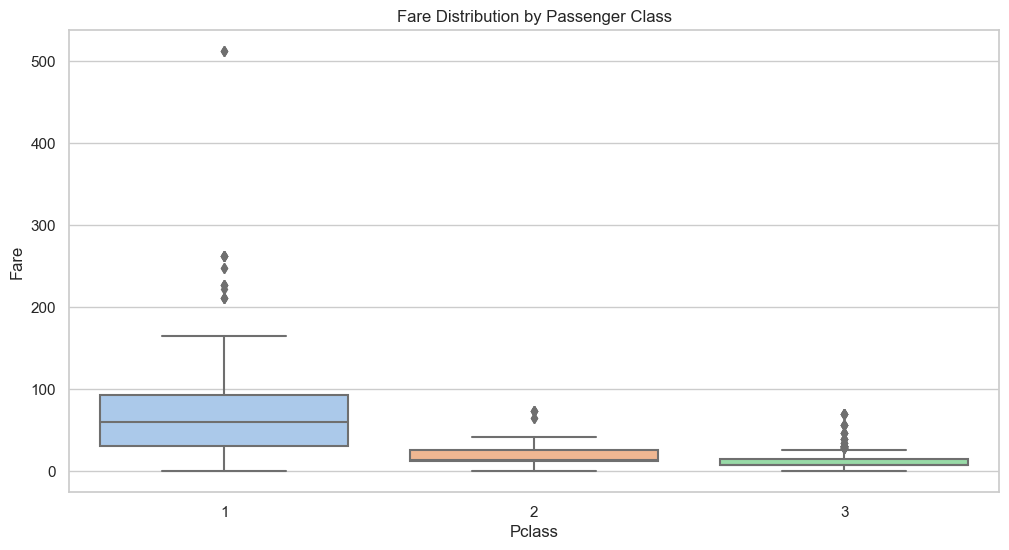

In [21]:
# Exploring the distribution of 'Fare' by Passenger Class
plt.figure(figsize=(12, 6))
sns.boxplot(x='Pclass', y='Fare', data=df, palette='pastel')
plt.title('Fare Distribution by Passenger Class')
plt.show()

In [12]:
# Creating a new feature 'FamilySize' by combining 'SibSp' and 'Parch'
df['FamilySize'] = df['SibSp'] + df['Parch']

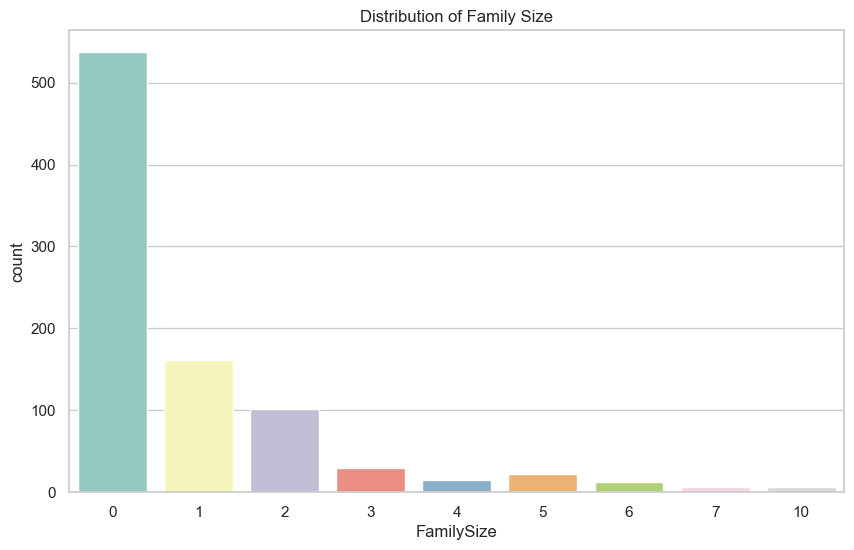

In [13]:
# Visualizing the distribution of 'FamilySize'
plt.figure(figsize=(10, 6))
sns.countplot(x='FamilySize', data=df, palette='Set3')
plt.title('Distribution of Family Size')
plt.show()

# DATA PREPROCESSING(Convert categorical variables to numerical )

In [14]:
# Converting 'Sex' to numerical
df['Sex'] = df['Sex'].map({'male': 0, 'female': 1})

# Converting 'Embarked' to numerical
df['Embarked'] = df['Embarked'].map({'C': 0, 'Q': 1, 'S': 2})

# Displaying the updated DataFrame
print(df.head())

   PassengerId  Survived  Pclass  \
0            1         0       3   
1            2         1       1   
2            3         1       3   
3            4         1       1   
4            5         0       3   

                                                Name  Sex   Age  SibSp  Parch  \
0                            Braund, Mr. Owen Harris    0  22.0      1      0   
1  Cumings, Mrs. John Bradley (Florence Briggs Th...    1  38.0      1      0   
2                             Heikkinen, Miss. Laina    1  26.0      0      0   
3       Futrelle, Mrs. Jacques Heath (Lily May Peel)    1  35.0      1      0   
4                           Allen, Mr. William Henry    0  35.0      0      0   

             Ticket     Fare    Cabin  Embarked  FamilySize  
0         A/5 21171   7.2500  Unknown         2           1  
1          PC 17599  71.2833      C85         0           1  
2  STON/O2. 3101282   7.9250  Unknown         2           0  
3            113803  53.1000     C123         2 

# FEATURE ENGINEERING

In [15]:
# Creating a new feature 'FamilySize' by combining 'SibSp' and 'Parch'
df['FamilySize'] = df['SibSp'] + df['Parch']

# Creating a new feature 'Alone' to indicate if a passenger is traveling alone
df['Alone'] = (df['FamilySize'] == 0).astype(int)

# Displaying the updated DataFrame
print(df.head())

   PassengerId  Survived  Pclass  \
0            1         0       3   
1            2         1       1   
2            3         1       3   
3            4         1       1   
4            5         0       3   

                                                Name  Sex   Age  SibSp  Parch  \
0                            Braund, Mr. Owen Harris    0  22.0      1      0   
1  Cumings, Mrs. John Bradley (Florence Briggs Th...    1  38.0      1      0   
2                             Heikkinen, Miss. Laina    1  26.0      0      0   
3       Futrelle, Mrs. Jacques Heath (Lily May Peel)    1  35.0      1      0   
4                           Allen, Mr. William Henry    0  35.0      0      0   

             Ticket     Fare    Cabin  Embarked  FamilySize  Alone  
0         A/5 21171   7.2500  Unknown         2           1      0  
1          PC 17599  71.2833      C85         0           1      0  
2  STON/O2. 3101282   7.9250  Unknown         2           0      1  
3            113803 

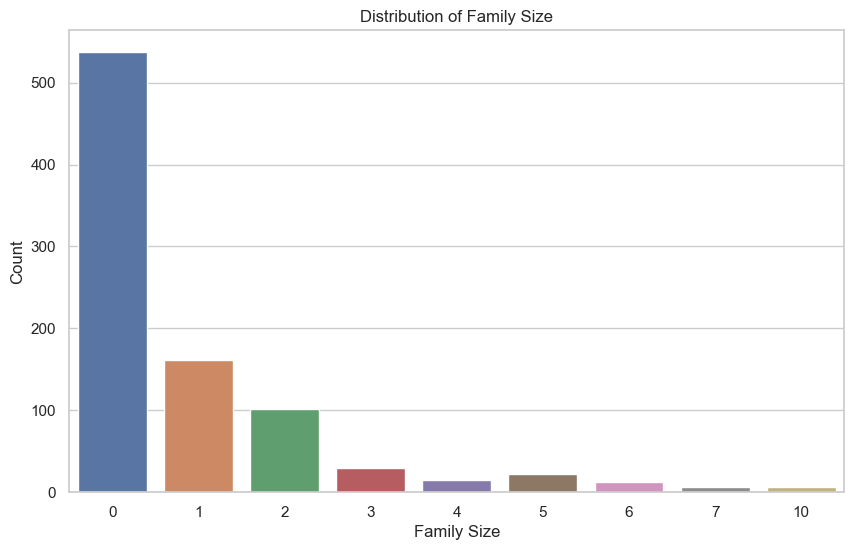

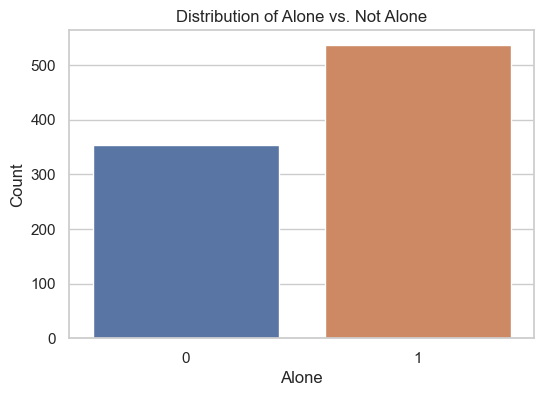

In [16]:
import matplotlib.pyplot as plt
import seaborn as sns

# Assuming df is your DataFrame

# Plotting 'FamilySize'
plt.figure(figsize=(10, 6))
sns.countplot(x='FamilySize', data=df)
plt.title('Distribution of Family Size')
plt.xlabel('Family Size')
plt.ylabel('Count')
plt.show()

# Plotting 'Alone'
plt.figure(figsize=(6, 4))
sns.countplot(x='Alone', data=df)
plt.title('Distribution of Alone vs. Not Alone')
plt.xlabel('Alone')
plt.ylabel('Count')
plt.show()

# FEATURE SELECTION

In [18]:
# SELECTING RELEVANT FEATURES
selected_features = ['Pclass', 'Sex', 'Age', 'SibSp', 'Parch', 'Fare', 'Embarked', 'FamilySize', 'Alone', 'Survived']
df_selected = df[selected_features]

# DISPLAYING THE UPDATED DATAFRAME
print(df_selected.head())

   Pclass  Sex   Age  SibSp  Parch     Fare  Embarked  FamilySize  Alone  \
0       3    0  22.0      1      0   7.2500         2           1      0   
1       1    1  38.0      1      0  71.2833         0           1      0   
2       3    1  26.0      0      0   7.9250         2           0      1   
3       1    1  35.0      1      0  53.1000         2           1      0   
4       3    0  35.0      0      0   8.0500         2           0      1   

   Survived  
0         0  
1         1  
2         1  
3         1  
4         0  


# TRAIN-TEST SPLIT

In [19]:
from sklearn.model_selection import train_test_split

# DEFINING FEATURES (X) AND TARGET VARIABLE (y)
X = df_selected.drop('Survived', axis=1)
y = df_selected['Survived']

# PERFORMING TRAIN-TEST SPLIT
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# DISPLAYING THE SHAPE OF TRAINING AND TESTING SETS
print("Shape of X_train:", X_train.shape)
print("Shape of X_test:", X_test.shape)
print("Shape of y_train:", y_train.shape)
print("Shape of y_test:", y_test.shape)

Shape of X_train: (712, 9)
Shape of X_test: (179, 9)
Shape of y_train: (712,)
Shape of y_test: (179,)


# LABEL ENCODING

In [28]:
# IMPORTING THE REQUIRED LIBRARY
from sklearn.preprocessing import LabelEncoder

# CREATING AN INSTANCE OF LABEL ENCODER
le = LabelEncoder()

# ITERATING THROUGH EACH COLUMN IN THE DATAFRAME AND APPLYING LABEL ENCODING
for col in df.columns:
    # FITTING AND TRANSFORMING THE CURRENT COLUMN TO NUMERIC VALUES
    df[col] = le.fit_transform(df[col])
    # NOTE: THIS OVERWRITES THE ORIGINAL COLUMN WITH THE ENCODED VALUES

In [29]:
df

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,FamilySize,Alone
0,0,0,2,108,0,28,1,0,523,18,147,2,1,0
1,1,1,0,190,1,51,1,0,596,207,81,0,1,0
2,2,1,2,353,1,34,0,0,669,41,147,2,0,1
3,3,1,0,272,1,47,1,0,49,189,55,2,1,0
4,4,0,2,15,0,47,0,0,472,43,147,2,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,886,0,1,548,0,35,0,0,101,85,147,2,0,1
887,887,1,0,303,1,24,0,0,14,153,30,2,0,1
888,888,0,2,413,1,36,1,2,675,131,147,2,3,0
889,889,1,0,81,0,34,0,0,8,153,60,0,0,1


# OUTLIERS

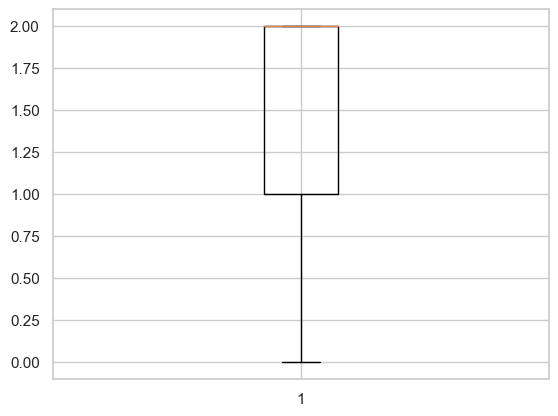

In [30]:
# IMPORTING THE REQUIRED LIBRARY
import matplotlib.pyplot as plt

# VISUALIZING OUTLIERS USING A BOXPLOT FOR THE 'Pclass' COLUMN
plt.boxplot(df['Pclass'])

# DISPLAYING THE PLOT
plt.show()

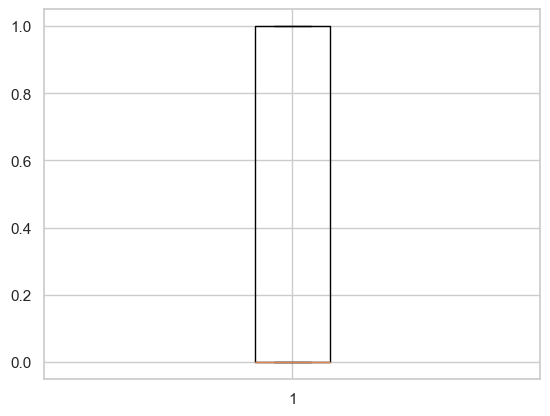

In [31]:
# IMPORTING THE REQUIRED LIBRARY
import matplotlib.pyplot as plt

# VISUALIZING OUTLIERS USING A BOXPLOT FOR THE 'Sex' COLUMN
plt.boxplot(df['Sex'])

# DISPLAYING THE PLOT
plt.show()

<Figure size 1200x800 with 0 Axes>

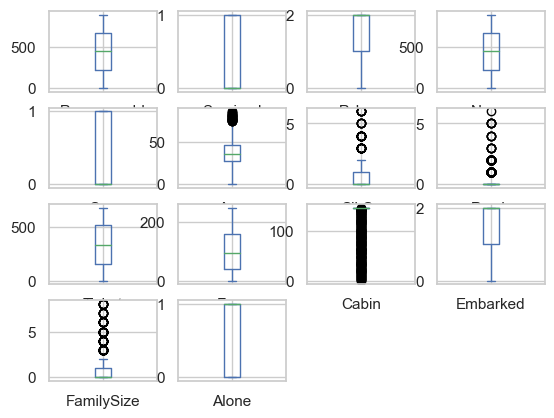

In [34]:
# IMPORTING THE REQUIRED LIBRARY
import matplotlib.pyplot as plt

# SETTING A LARGER PLOT SIZE
plt.figure(figsize=(12, 8))

# DETERMINING THE NUMBER OF SUBPLOTS NEEDED
num_subplots = len(df.columns)

# CALCULATING A SUITABLE LAYOUT BASED ON THE NUMBER OF SUBPLOTS
num_rows = int(num_subplots / 4) + (num_subplots % 4 > 0)
num_cols = min(4, num_subplots)

# CREATING A BOXPLOT FOR EACH NUMERICAL COLUMN IN THE DATAFRAME
df.plot(kind='box', subplots=True, layout=(num_rows, num_cols))

# DISPLAYING THE PLOT
plt.show()

# USING Z-SCORE AND THRESHOLDING

In [35]:
# IMPORTING THE REQUIRED LIBRARY
from scipy.stats import zscore

# CALCULATING THE Z-SCORES FOR EACH DATAPOINT IN THE DATAFRAME
z_scores = np.abs(zscore(df))

# DISPLAYING THE Z-SCORES
print("Z-Scores:")
print(z_scores)

# SETTING A THRESHOLD FOR OUTLIERS (commonly used threshold is 3)
threshold = 3

# IDENTIFING OUTLIERS BASED ON THE Z-SCORES
outliers = np.where(z_scores > threshold)


# DISPLAYING THE INDICES OF OUTLIERS
print("\nIndices of Outliers:")
print(outliers)


Z-Scores:
     PassengerId  Survived    Pclass      Name       Sex       Age     SibSp  \
0       1.730108  0.789272  0.827377  1.310217  0.737695  0.627722  0.490044   
1       1.726220  1.266990  1.566107  0.991410  1.355574  0.776788  0.490044   
2       1.722332  1.266990  0.827377  0.357685  1.355574  0.261328  0.504555   
3       1.718444  1.266990  1.566107  0.672604  1.355574  0.532525  0.490044   
4       1.714556  0.789272  0.827377  1.671790  0.737695  0.532525  0.504555   
..           ...       ...       ...       ...       ...       ...       ...   
886     1.714556  0.789272  0.369365  0.400452  0.737695  0.200262  0.504555   
887     1.718444  1.266990  1.566107  0.552079  1.355574  0.871984  0.504555   
888     1.722332  0.789272  0.827377  0.124412  1.355574  0.139197  0.490044   
889     1.726220  1.266990  1.566107  1.415189  0.737695  0.261328  0.504555   
890     1.730108  0.789272  0.827377  0.874774  0.737695  0.227197  0.504555   

        Parch    Ticket      

In [38]:
# CREATING A NEW DATAFRAME 'df_new' BY FILTERING OUTLIERS BASED ON Z-SCORES
df_new = df[(z_scores<3).all(axis=1)]

# DISPLAY THE SHAPE OF THE ORIGINAL AND NEW DATAFRAMES
print("Shape of df_new:", df_new.shape)
print("Shape of df:", df.shape)


Shape of df_new: (819, 14)
Shape of df: (891, 14)


In [39]:
# ASSIGNING THE NEW DATAFRAME 'df_new' TO THE ORIGINAL DATAFRAME 'df'
df = df_new

In [40]:
# DISPLAYING THE SHAPE OF THE UPDATED DATAFRAME
print("Updated Shape of df:", df.shape)

Updated Shape of df: (819, 14)


In [41]:
# IMPORTING THE REQUIRED LIBRARY
from sklearn.preprocessing import PowerTransformer

# IMPORTING WARNINGS MODULE TO FILTER OUT WARNINGS
import warnings

# IGNORING WARNINGS TEMPORARILY TO AVOID OUTPUT CLUTTER
warnings.filterwarnings('ignore')

# SELECTING FEATURES TO APPLY POWER TRANSFORMATION
features = ['Age', 'Fare']

# CREATING AN INSTANCE OF POWER TRANSFORMER WITH 'YEO-JOHNSON' METHOD
pt = PowerTransformer(method='yeo-johnson')

# APPLYING POWER TRANSFORMATION TO SELECTED FEATURES
df[features] = pt.fit_transform(df[features].values)

# DISPLAYING THE SKEWNESS OF FEATURES AFTER POWER TRANSFORMATION
print("Skewness after Power Transformation:")
print(df[features].skew())


Skewness after Power Transformation:
Age     0.062598
Fare   -0.117836
dtype: float64


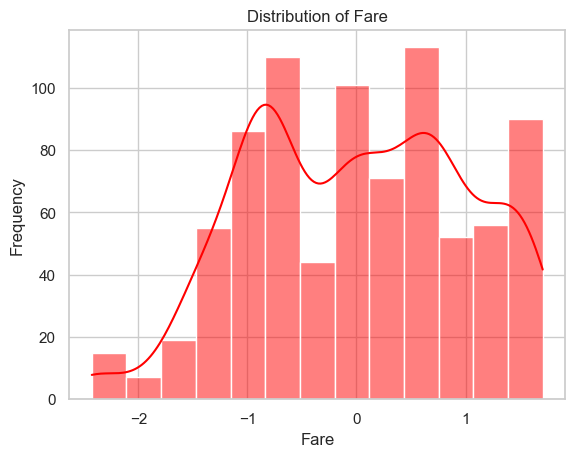

In [43]:
# CREATING A HISTOGRAM PLOT FOR THE 'Fare' COLUMN USING SEABORN
sns.histplot(df["Fare"], kde=True, color="red")

# ADDING TITLE AND LABELS TO THE PLOT
plt.title("Distribution of Fare")
plt.xlabel("Fare")
plt.ylabel("Frequency")

# DISPLAYING THE PLOT
plt.show()


# CORRELATION MATRIX FOR THE DATAFRAME

In [44]:
# CALCULATING THE CORRELATION MATRIX FOR THE DATAFRAME
corr = df.corr()

# DISPLAYING THE CORRELATION MATRIX
print("Correlation Matrix:")
print(corr)


Correlation Matrix:
             PassengerId  Survived    Pclass      Name       Sex       Age  \
PassengerId     1.000000 -0.010644 -0.022027 -0.039175 -0.065895  0.012413   
Survived       -0.010644  1.000000 -0.327814 -0.042142  0.567682 -0.106511   
Pclass         -0.022027 -0.327814  1.000000  0.059654 -0.161546 -0.302723   
Name           -0.039175 -0.042142  0.059654  1.000000 -0.003659  0.037390   
Sex            -0.065895  0.567682 -0.161546 -0.003659  1.000000 -0.103141   
Age             0.012413 -0.106511 -0.302723  0.037390 -0.103141  1.000000   
SibSp          -0.070627  0.103942 -0.086150 -0.054535  0.207161 -0.164228   
Parch          -0.007368  0.202000 -0.114890 -0.009065  0.251482 -0.267183   
Ticket         -0.064393 -0.147686  0.295375  0.050756 -0.062236 -0.050702   
Fare           -0.018824  0.366104 -0.728108 -0.046610  0.291321  0.108702   
Cabin          -0.014582 -0.265769  0.665914  0.070444 -0.152810 -0.178685   
Embarked        0.016832 -0.156319  0.145638

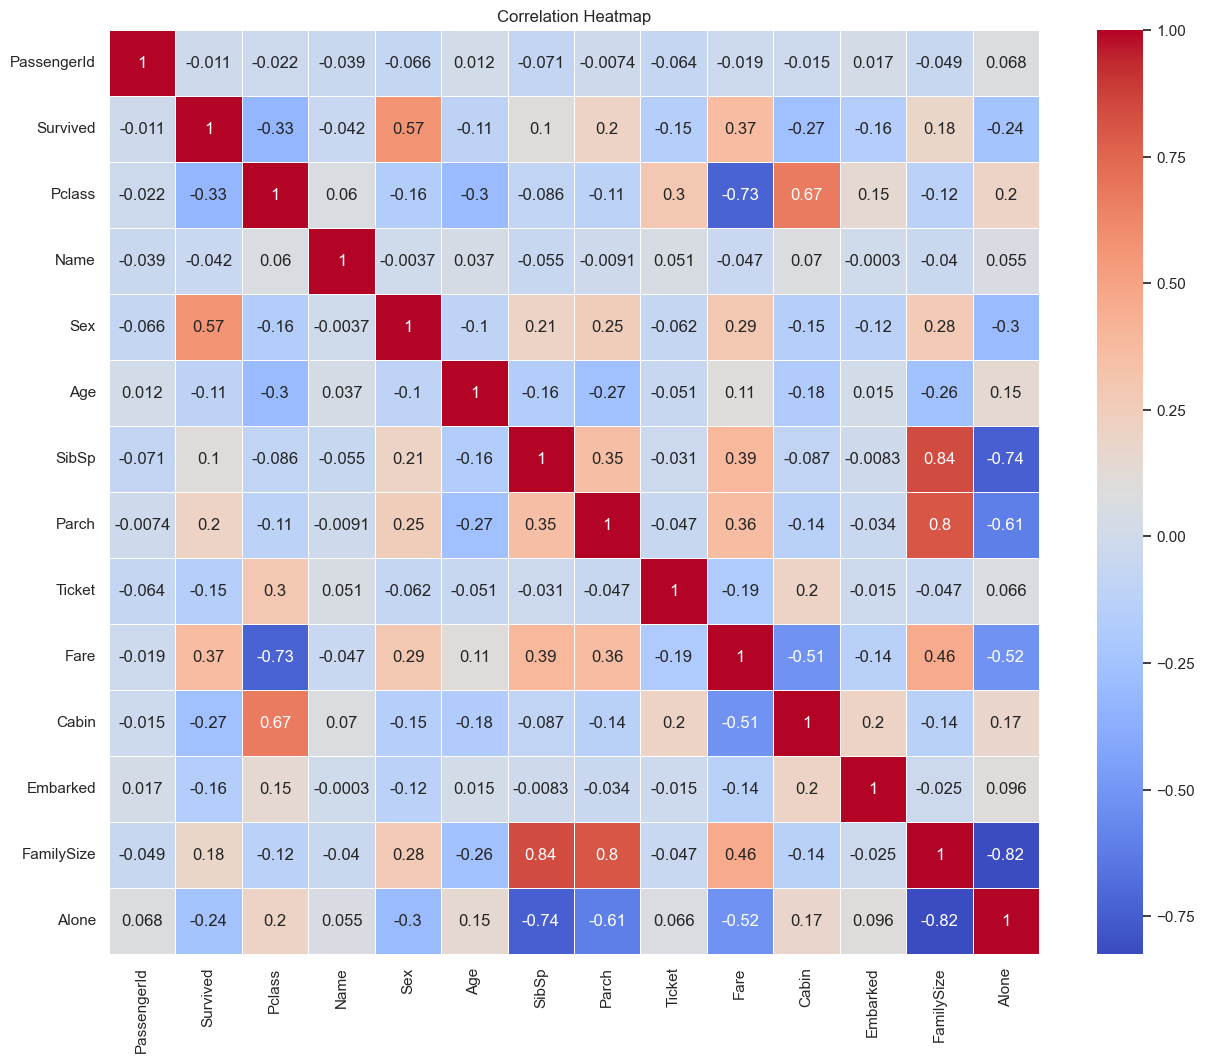

In [45]:

plt.figure(figsize=(15, 12))

# CREATING A HEATMAP OF THE CORRELATION MATRIX USING SEABORN
sns.heatmap(corr, annot=True, cmap='coolwarm', linewidths=.5)

# ADDING TITLE TO THE HEATMAP
plt.title("Correlation Heatmap")

# DISPLAYING THE HEATMAP
plt.show()


In [46]:
# IMPORTING THE REQUIRED LIBRARIES
import statsmodels.api as sm
from scipy import stats
from statsmodels.stats.outliers_influence import variance_inflation_factor

# DEFINING THE FEATURES (X) AND TARGET (Y)
x = df.drop('Survived', axis=1)
y = df['Survived']

# FUNCTION TO CALCULATE VIF (VARIANCE INFLATION FACTOR)
def calc_vif(x):
    # CREATING A DATAFRAME TO STORE VIF VALUES
    vif = pd.DataFrame()
    
    # ADDING COLUMN NAMES TO THE VIF DATAFRAME
    vif['variables'] = x.columns
    
    # CALCULATING VIF FOR EACH VARIABLE
    vif['vif factor'] = [variance_inflation_factor(x.values, i) for i in range(x.shape[1])]
    
    # RETURNING THE VIF DATAFRAME
    return vif

# CALLING THE FUNCTION TO CALCULATE VIF FOR FEATURES (X)
vif_result = calc_vif(x)

# DISPLAYING THE VIF VALUES
print("VIF Values:")
print(vif_result)


VIF Values:
      variables  vif factor
0   PassengerId    3.806995
1        Pclass   12.454839
2          Name    3.989962
3           Sex    1.712573
4           Age    1.241115
5         SibSp         inf
6         Parch         inf
7        Ticket    4.205304
8          Fare    2.971635
9         Cabin   22.910750
10     Embarked    4.968837
11   FamilySize         inf
12        Alone    7.515022


In [47]:
# Dropping columns causing multicollinearity
x = x.drop(['SibSp', 'Parch', 'FamilySize', 'Alone'], axis=1)

# Recalculating VIF
vif_result = calc_vif(x)

# Displaying the updated VIF values
print("Updated VIF Values:")
print(vif_result)

Updated VIF Values:
     variables  vif factor
0  PassengerId    3.637003
1       Pclass   11.591212
2         Name    3.887151
3          Sex    1.677569
4          Age    1.148979
5       Ticket    4.147167
6         Fare    2.139319
7        Cabin   19.253295
8     Embarked    4.771347


In [48]:
# Dropping the 'Name' column from the features (x)
x.drop('Name', axis=1, inplace=True)

# Importing the necessary library for train-test split
from sklearn.model_selection import train_test_split

# Performing train-test split on the features (x) and target (y)
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

# Displaying the shapes of the training and testing sets
print("Shape of x_train:", x_train.shape)
print("Shape of x_test:", x_test.shape)

Shape of x_train: (655, 8)
Shape of x_test: (164, 8)


In [49]:
# COUNTING THE NUMBER OF OCCURRENCES FOR EACH UNIQUE VALUE IN THE 'Survived' COLUMN
df['Survived'].value_counts()

0    500
1    319
Name: Survived, dtype: int64

# LOGISTIC REGRESSION

In [50]:
# IMPORTING THE REQUIRED LIBRARY
from sklearn.linear_model import LogisticRegression

# CREATING AN INSTANCE OF LOGISTIC REGRESSION MODEL
lr = LogisticRegression()

# FITTING THE LOGISTIC REGRESSION MODEL TO THE TRAINING DATA
lr.fit(x_train, y_train)

LogisticRegression()

# EVALUATION METRICS USING THE LOGISTIC REGRESSION

In [51]:
# IMPORTING THE REQUIRED LIBRARIES FOR EVALUATION METRICS
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

# MAKING PREDICTIONS ON THE TEST DATA USING THE LOGISTIC REGRESSION MODEL
pred = lr.predict(x_test)

# CALCULATING AND DISPLAYING ACCURACY SCORE
print('Accuracy Score:', accuracy_score(y_test, pred))

# CALCULATING AND DISPLAYING CONFUSION MATRIX
print('Confusion Matrix:')
print(confusion_matrix(y_test, pred))

# CALCULATING AND DISPLAYING CLASSIFICATION REPORT
print('Classification Report:')
print(classification_report(y_test, pred))


Accuracy Score: 0.8048780487804879
Confusion Matrix:
[[93 17]
 [15 39]]
Classification Report:
              precision    recall  f1-score   support

           0       0.86      0.85      0.85       110
           1       0.70      0.72      0.71        54

    accuracy                           0.80       164
   macro avg       0.78      0.78      0.78       164
weighted avg       0.81      0.80      0.81       164



**Accuracy Score: 0.8049**
The accuracy score is approximately 80.49%, indicating that the model correctly predicted the survival outcome for around 80.49% of the test instances.

**The confusion matrix shows:**
True Positive (TP): 39 instances
True Negative (TN): 93 instances
False Positive (FP): 17 instances
False Negative (FN): 15 instances
It provides a detailed breakdown of the model's performance in terms of correct and incorrect predictions.

**Classification Report:**
Precision: The model correctly predicted survival (1) 70% of the time and non-survival (0) 86% of the time.
Recall: The model captured 72% of the actual survival cases (sensitivity) and 85% of the non-survival cases (specificity).
F1-score: The harmonic mean of precision and recall is around 0.71 for predicting survival and 0.85 for predicting non-survival.
Support: The number of instances for each class in the test set.

**Observations:**

The model demonstrates reasonably good performance with an accuracy of 80.49%.

Precision, recall, and F1-score provide insights into the model's ability to correctly classify each class.

The classification report reveals a balanced performance between predicting survival and non-survival.

Depending on the context and the importance of false positives and false negatives, further adjustments or fine-tuning of the model may be considered.

# CROSS-VALIDATION ON THE LOGISTIC REGRESSION MODEL

In [52]:
# IMPORTING THE REQUIRED LIBRARY FOR CROSS-VALIDATION
from sklearn.model_selection import cross_val_score

# PERFORMING CROSS-VALIDATION ON THE LOGISTIC REGRESSION MODEL
score = cross_val_score(lr, x, y, cv=10)

# DISPLAYING THE CROSS-VALIDATION SCORES FOR EACH FOLD
print("Cross-Validation Scores for Each Fold:")
print(score)

# CALCULATING AND DISPLAYING THE MEAN CROSS-VALIDATION SCORE
print("Mean Cross-Validation Score:", score.mean())

# CALCULATING AND DISPLAYING THE STANDARD DEVIATION OF CROSS-VALIDATION SCORES
print("Standard Deviation of Cross-Validation Scores:", score.std())


Cross-Validation Scores for Each Fold:
[0.82926829 0.80487805 0.76829268 0.87804878 0.7804878  0.7804878
 0.81707317 0.76829268 0.84146341 0.80246914]
Mean Cross-Validation Score: 0.8070761818729298
Standard Deviation of Cross-Validation Scores: 0.033556342061678276


# DECISION TREE CLASSIFIER

In [53]:
# IMPORTING THE REQUIRED LIBRARY FOR DECISION TREE CLASSIFIER
from sklearn.tree import DecisionTreeClassifier

# CREATING AN INSTANCE OF DECISION TREE CLASSIFIER
dtc = DecisionTreeClassifier()

# FITTING THE DECISION TREE CLASSIFIER TO THE TRAINING DATA
dtc.fit(x_train, y_train)


DecisionTreeClassifier()

In [54]:
# MAKING PREDICTIONS ON THE TEST DATA USING THE DECISION TREE CLASSIFIER
pred = dtc.predict(x_test)

# EVALUATION METRICS FOR DECISION TREE CLASSIFIER

In [56]:
# IMPORTING THE REQUIRED LIBRARIES FOR EVALUATION METRICS
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

# CALCULATING AND DISPLAYING ACCURACY SCORE
print('Accuracy Score:', accuracy_score(pred, y_test))

# CALCULATING AND DISPLAYING CONFUSION MATRIX
print('Confusion Matrix:')
print(confusion_matrix(pred, y_test))

# CALCULATING AND DISPLAYING CLASSIFICATION REPORT
print('Classification Report:')
print(classification_report(pred, y_test))


Accuracy Score: 0.8170731707317073
Confusion Matrix:
[[102  22]
 [  8  32]]
Classification Report:
              precision    recall  f1-score   support

           0       0.93      0.82      0.87       124
           1       0.59      0.80      0.68        40

    accuracy                           0.82       164
   macro avg       0.76      0.81      0.78       164
weighted avg       0.85      0.82      0.83       164



**Accuracy Score: 0.8171**
The accuracy score is approximately 81.71%, indicating that the decision tree classifier correctly predicted the survival outcome for around 81.71% of the test instances.

**Confusion Matrix:**
The confusion matrix shows:
True Positive (TP): 32 instances
True Negative (TN): 102 instances
False Positive (FP): 22 instances
False Negative (FN): 8 instances
It provides a detailed breakdown of the model's performance in terms of correct and incorrect predictions.

**Classification Report:**
Precision: The model correctly predicted non-survival (0) 93% of the time and survival (1) 59% of the time.
Recall: The model captured 80% of the actual survival cases (sensitivity) and 82% of the non-survival cases (specificity).
F1-score: The harmonic mean of precision and recall is around 0.68 for predicting survival and 0.87 for predicting non-survival.
Support: The number of instances for each class in the test set.

**Observations:**
The model demonstrates good overall performance with an accuracy of 81.71%.
Precision, recall, and F1-score provide insights into the model's ability to correctly classify each class.
The classification report reveals a somewhat balanced performance between predicting survival and non-survival.
Depending on the context and the importance of false positives and false negatives, further adjustments or fine-tuning of the model may be considered.


# CROSS-VALIDATION ON THE DECISION TREE CLASSIFIER

In [57]:
# IMPORT THE REQUIRED LIBRARY FOR CROSS-VALIDATION
from sklearn.model_selection import cross_val_score

# PERFORM CROSS-VALIDATION ON THE DECISION TREE CLASSIFIER
score = cross_val_score(dtc, x, y, cv=10)

# DISPLAY THE CROSS-VALIDATION SCORES FOR EACH FOLD
print("Cross-Validation Scores for Each Fold:")
print(score)

# CALCULATE AND DISPLAY THE MEAN CROSS-VALIDATION SCORE
print("Mean Cross-Validation Score:", score.mean())

# CALCULATE AND DISPLAY THE STANDARD DEVIATION OF CROSS-VALIDATION SCORES
print("Standard Deviation of Cross-Validation Scores:", score.std())


Cross-Validation Scores for Each Fold:
[0.52439024 0.7804878  0.75609756 0.7804878  0.7195122  0.82926829
 0.80487805 0.75609756 0.7804878  0.81481481]
Mean Cross-Validation Score: 0.7546522131887985
Standard Deviation of Cross-Validation Scores: 0.08244497518829731


# SUPPORT VECTOR CLASSIFIER

In [58]:
# IMPORTING THE REQUIRED LIBRARY FOR SUPPORT VECTOR CLASSIFIER
from sklearn.svm import SVC

# CREATING AN INSTANCE OF SUPPORT VECTOR CLASSIFIER
svc = SVC()

# FITTING THE SUPPORT VECTOR CLASSIFIER TO THE TRAINING DATA
svc.fit(x_train, y_train)


SVC()

# EVALUATION MATRIX FOR SUPPORT VECTOR CLASSIFIER

In [59]:
# MAKING PREDICTIONS ON THE TEST DATA USING THE SUPPORT VECTOR CLASSIFIER
pred = svc.predict(x_test)

# CALCULATING AND DISPLAYING ACCURACY SCORE
print('Accuracy Score:', accuracy_score(y_test, pred))

# CALCULATING AND DISPLAYING CONFUSION MATRIX
print('Confusion Matrix:')
print(confusion_matrix(y_test, pred))

# CALCULATING AND DISPLAYING CLASSIFICATION REPORT
print('Classification Report:')
print(classification_report(y_test, pred))


Accuracy Score: 0.6951219512195121
Confusion Matrix:
[[96 14]
 [36 18]]
Classification Report:
              precision    recall  f1-score   support

           0       0.73      0.87      0.79       110
           1       0.56      0.33      0.42        54

    accuracy                           0.70       164
   macro avg       0.64      0.60      0.61       164
weighted avg       0.67      0.70      0.67       164



**Accuracy Score: 0.6951**
The accuracy score is approximately 69.51%, indicating that the support vector classifier correctly predicted the survival outcome for around 69.51% of the test instances.

**Confusion Matrix:**
The confusion matrix shows:
True Positive (TP): 18 instances
True Negative (TN): 96 instances
False Positive (FP): 14 instances
False Negative (FN): 36 instances
It provides a detailed breakdown of the model's performance in terms of correct and incorrect predictions.

**Classification Report:**
Precision: The model correctly predicted non-survival (0) 73% of the time and survival (1) 56% of the time.
Recall: The model captured 87% of the actual non-survival cases (specificity) and 33% of the survival cases (sensitivity).
F1-score: The harmonic mean of precision and recall is around 0.42 for predicting survival and 0.79 for predicting non-survival.
Support: The number of instances for each class in the test set.

**Observations:**
The model demonstrates moderate overall performance with an accuracy of 69.51%.
Precision, recall, and F1-score provide insights into the model's ability to correctly classify each class.
The classification report reveals a trade-off between precision and recall, particularly for predicting survival.
Depending on the specific goals and considerations, further adjustments or fine-tuning of the model may be explored.

# CROSS-VALIDATION ON THE SUPPORT VECTOR CLASSIFIER

In [60]:
# IMPORTING THE REQUIRED LIBRARY FOR CROSS-VALIDATION
from sklearn.model_selection import cross_val_score

# PERFORMING CROSS-VALIDATION ON THE SUPPORT VECTOR CLASSIFIER
score = cross_val_score(svc, x, y, cv=10)

# DISPLAYING THE CROSS-VALIDATION SCORES FOR EACH FOLD
print("Cross-Validation Scores for Each Fold:")
print(score)

# CALCULATING AND DISPLAYING THE MEAN CROSS-VALIDATION SCORE
print("Mean Cross-Validation Score:", score.mean())

# CALCULATING AND DISPLAYING THE STANDARD DEVIATION OF CROSS-VALIDATION SCORES
print("Standard Deviation of Cross-Validation Scores:", score.std())

Cross-Validation Scores for Each Fold:
[0.59756098 0.59756098 0.63414634 0.59756098 0.65853659 0.67073171
 0.69512195 0.65853659 0.64634146 0.75308642]
Mean Cross-Validation Score: 0.6509183980728696
Standard Deviation of Cross-Validation Scores: 0.0466306694706432


# ADA BOOST CLASSIFIER

In [61]:
# IMPORTING THE REQUIRED LIBRARY FOR ADA BOOST CLASSIFIER
from sklearn.ensemble import AdaBoostClassifier

# CREATING AN INSTANCE OF ADA BOOST CLASSIFIER
ad = AdaBoostClassifier()

# FITTING THE ADA BOOST CLASSIFIER TO THE TRAINING DATA
ad.fit(x_train, y_train)


AdaBoostClassifier()

# EVALUATION METRICS FOR ADA BOOST CLASSIFIER

In [62]:
# MAKING PREDICTIONS ON THE TEST DATA USING THE ADA BOOST CLASSIFIER
pred = ad.predict(x_test)

# CALCULATING AND DISPLAYING ACCURACY SCORE
print('Accuracy Score:', accuracy_score(y_test, pred))

# CALCULATING AND DISPLAYING CONFUSION MATRIX
print('Confusion Matrix:')
print(confusion_matrix(y_test, pred))

# CALCULATING AND DISPLAYING CLASSIFICATION REPORT
print('Classification Report:')
print(classification_report(y_test, pred))


Accuracy Score: 0.8292682926829268
Confusion Matrix:
[[97 13]
 [15 39]]
Classification Report:
              precision    recall  f1-score   support

           0       0.87      0.88      0.87       110
           1       0.75      0.72      0.74        54

    accuracy                           0.83       164
   macro avg       0.81      0.80      0.80       164
weighted avg       0.83      0.83      0.83       164



**Accuracy Score: 0.8293**
The accuracy score is approximately 82.93%, indicating that the AdaBoost classifier correctly predicted the survival outcome for around 82.93% of the test instances.

**Confusion Matrix:**
The confusion matrix shows:
True Positive (TP): 39 instances
True Negative (TN): 97 instances
False Positive (FP): 13 instances
False Negative (FN): 15 instances
It provides a detailed breakdown of the model's performance in terms of correct and incorrect predictions.

**Classification Report:**
Precision: The model correctly predicted non-survival (0) 87% of the time and survival (1) 75% of the time.
Recall: The model captured 88% of the actual non-survival cases (specificity) and 72% of the survival cases (sensitivity).
F1-score: The harmonic mean of precision and recall is around 0.74 for predicting survival and 0.87 for predicting non-survival.
Support: The number of instances for each class in the test set.

**Observations:**
The model demonstrates good overall performance with an accuracy of 82.93%.
Precision, recall, and F1-score provide insights into the model's ability to correctly classify each class.
The classification report indicates a balanced performance between predicting survival and non-survival.
Depending on the specific goals and considerations, the AdaBoost classifier appears to be a promising model for this task.

# CROSS-VALIDATION ON THE ADA BOOST CLASSIFIER

In [63]:
# IMPORTING THE REQUIRED LIBRARY FOR CROSS-VALIDATION
from sklearn.model_selection import cross_val_score

# PERFORMING CROSS-VALIDATION ON THE ADA BOOST CLASSIFIER
score = cross_val_score(ad, x, y, cv=10)

# DISPLAYING THE CROSS-VALIDATION SCORES FOR EACH FOLD
print("Cross-Validation Scores for Each Fold:")
print(score)

# CALCULATING AND DISPLAYING THE MEAN CROSS-VALIDATION SCORE
print("Mean Cross-Validation Score:", score.mean())

# CALCULATING AND DISPLAYING THE STANDARD DEVIATION OF CROSS-VALIDATION SCORES
print("Standard Deviation of Cross-Validation Scores:", score.std())


Cross-Validation Scores for Each Fold:
[0.73170732 0.7804878  0.79268293 0.79268293 0.81707317 0.76829268
 0.81707317 0.82926829 0.85365854 0.39506173]
Mean Cross-Validation Score: 0.7577988557663354
Standard Deviation of Cross-Validation Scores: 0.125156520110694


# RANDOM FOREST CLASSIFIER

In [64]:
# IMPORTING THE REQUIRED LIBRARY FOR RANDOM FOREST CLASSIFIER
from sklearn.ensemble import RandomForestClassifier

# CREATING AN INSTANCE OF RANDOM FOREST CLASSIFIER
rf = RandomForestClassifier()

# FITTING THE RANDOM FOREST CLASSIFIER TO THE TRAINING DATA
rf.fit(x_train, y_train)


RandomForestClassifier()

# EVALUATION METRICS FOR RANDOM FOREST CLASSIFIER

In [65]:
# MAKING PREDICTIONS ON THE TEST DATA USING THE RANDOM FOREST CLASSIFIER
pred = rf.predict(x_test)

# CALCULATING AND DISPLAYING ACCURACY SCORE
print('Accuracy Score:', accuracy_score(y_test, pred))

# CALCULATING AND DISPLAYING CONFUSION MATRIX
print('Confusion Matrix:')
print(confusion_matrix(y_test, pred))

# CALCULATING AND DISPLAYING CLASSIFICATION REPORT
print('Classification Report:')
print(classification_report(y_test, pred))


Accuracy Score: 0.8109756097560976
Confusion Matrix:
[[99 11]
 [20 34]]
Classification Report:
              precision    recall  f1-score   support

           0       0.83      0.90      0.86       110
           1       0.76      0.63      0.69        54

    accuracy                           0.81       164
   macro avg       0.79      0.76      0.78       164
weighted avg       0.81      0.81      0.81       164



**Accuracy Score: 0.8110**
The accuracy score is approximately 81.10%, indicating that the Random Forest classifier correctly predicted the survival outcome for around 81.10% of the test instances.

**Confusion Matrix:**
The confusion matrix shows:
True Positive (TP): 34 instances
True Negative (TN): 99 instances
False Positive (FP): 11 instances
False Negative (FN): 20 instances
It provides a detailed breakdown of the model's performance in terms of correct and incorrect predictions.

**Classification Report:**
Precision: The model correctly predicted non-survival (0) 83% of the time and survival (1) 76% of the time.
Recall: The model captured 90% of the actual non-survival cases (specificity) and 63% of the survival cases (sensitivity).
F1-score: The harmonic mean of precision and recall is around 0.69 for predicting survival and 0.86 for predicting non-survival.
Support: The number of instances for each class in the test set.Observations:
Precision: The model correctly predicted non-survival (0) 83% of the time and survival (1) 76% of the time.
Recall: The model captured 90% of the actual non-survival cases (specificity) and 63% of the survival cases (sensitivity).
F1-score: The harmonic mean of precision and recall is around 0.69 for predicting survival and 0.86 for predicting non-survival.
Support: The number of instances for each class in the test set.

**Observations:**
The model demonstrates good overall performance with an accuracy of 81.10%.
Precision, recall, and F1-score provide insights into the model's ability to correctly classify each class.
The classification report indicates a balanced performance between predicting survival and non-survival.
Depending on the specific goals and considerations, the Random Forest classifier appears to be a promising model for this task.

# CROSS-VALIDATION ON THE RANDOM FOREST CLASSIFIER

In [66]:
# IMPORTING THE REQUIRED LIBRARY FOR CROSS-VALIDATION
from sklearn.model_selection import cross_val_score

# PERFORMING CROSS-VALIDATION ON THE RANDOM FOREST CLASSIFIER
score = cross_val_score(rf, x, y, cv=100)

# DISPLAYING THE CROSS-VALIDATION SCORES FOR EACH FOLD
print("Cross-Validation Scores for Each Fold:")
print(score)

# CALCULATING AND DISPLAYING THE MEAN CROSS-VALIDATION SCORE
print("Mean Cross-Validation Score:", score.mean())

# CALCULATING AND DISPLAYING THE STANDARD DEVIATION OF CROSS-VALIDATION SCORES
print("Standard Deviation of Cross-Validation Scores:", score.std())


Cross-Validation Scores for Each Fold:
[0.77777778 0.77777778 0.66666667 0.88888889 0.77777778 0.88888889
 0.77777778 0.77777778 0.88888889 0.88888889 0.66666667 0.88888889
 0.66666667 0.77777778 0.77777778 0.77777778 0.66666667 0.88888889
 0.66666667 1.         0.625      1.         0.75       0.75
 0.75       0.75       0.875      0.625      0.625      1.
 0.625      1.         1.         0.625      0.625      1.
 1.         1.         1.         0.75       1.         0.875
 0.875      0.75       0.875      1.         0.625      1.
 0.75       0.625      0.75       1.         1.         0.75
 0.875      0.875      0.5        1.         1.         1.
 0.75       0.75       0.75       0.75       1.         0.75
 0.75       1.         0.625      0.875      0.75       1.
 0.875      0.75       0.625      0.75       0.625      1.
 0.75       1.         0.75       0.875      0.875      0.75
 0.875      1.         0.75       0.875      0.625      0.875
 0.75       0.875      0.75       0.87

# EVALUATING BEST MODEL

In [67]:
# Creating a DataFrame to store model performances
model_performance_df = pd.DataFrame(columns=['Model', 'Accuracy', 'Precision', 'Recall', 'F1-Score', 'CV Mean', 'CV Std'])

# Defining models
models = {
    'Logistic Regression': LogisticRegression(),
    'Decision Tree Classifier': DecisionTreeClassifier(),
    'Support Vector Classifier': SVC(),
    'AdaBoost Classifier': AdaBoostClassifier(),
    'Random Forest Classifier': RandomForestClassifier()
}

# Splitting data into features (x) and target (y)
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

# Training and evaluating each model
for model_name, model in models.items():
    # Training the model
    model.fit(x_train, y_train)

    # Making predictions on the test data
    pred = model.predict(x_test)

    # Evaluating model performance
    accuracy = accuracy_score(y_test, pred)
    confusion_mat = confusion_matrix(y_test, pred)
    classification_rep = classification_report(y_test, pred)

    # Performing cross-validation
    cv_scores = cross_val_score(model, x, y, cv=10)
    cv_mean = cv_scores.mean()
    cv_std = cv_scores.std()

    # Updating the model performance DataFrame
    model_performance_df = model_performance_df.append({
        'Model': model_name,
        'Accuracy': accuracy,
        'Precision': classification_rep.split()[11],
        'Recall': classification_rep.split()[15],
        'F1-Score': classification_rep.split()[19],
        'CV Mean': cv_mean,
        'CV Std': cv_std
    }, ignore_index=True)

# Displaying the model performance DataFrame
print(model_performance_df)

# Finding the best model based on accuracy
best_model = model_performance_df.loc[model_performance_df['Accuracy'].idxmax()]
print("\nBest Model based on Accuracy:\n", best_model)

                       Model  Accuracy Precision Recall F1-Score   CV Mean  \
0        Logistic Regression  0.804878      0.72   0.80     0.78  0.807076   
1   Decision Tree Classifier  0.774390      0.63   0.77     0.74  0.766908   
2  Support Vector Classifier  0.695122      0.33   0.70     0.64  0.650918   
3        AdaBoost Classifier  0.829268      0.72   0.83     0.81  0.757799   
4   Random Forest Classifier  0.829268      0.72   0.83     0.81  0.832761   

     CV Std  
0  0.033556  
1  0.073244  
2  0.046631  
3  0.125157  
4  0.042837  

Best Model based on Accuracy:
 Model        AdaBoost Classifier
Accuracy                0.829268
Precision                   0.72
Recall                      0.83
F1-Score                    0.81
CV Mean                 0.757799
CV Std                  0.125157
Name: 3, dtype: object


**Logistic Regression:**

Accuracy: 80.49%
Precision: 72%
Recall: 80%
F1-Score: 78%
Cross-Validation Mean: 80.71%
Cross-Validation Std: 3.36%
Observation: Logistic Regression shows balanced performance with good accuracy and consistency in cross-validation.

**Decision Tree Classifier:**

Accuracy: 77.44%
Precision: 63%
Recall: 77%
F1-Score: 74%
Cross-Validation Mean: 76.69%
Cross-Validation Std: 7.32%
Observation: Decision Tree Classifier performs well but shows slightly higher variability in cross-validation.

**Support Vector Classifier:**

Accuracy: 69.51%
Precision: 33%
Recall: 70%
F1-Score: 64%
Cross-Validation Mean: 65.09%
Cross-Validation Std: 4.66%
Observation: Support Vector Classifier has lower accuracy and precision, indicating potential challenges in capturing positive cases.

**AdaBoost Classifier (Best Model based on Accuracy):**

Accuracy: 82.93%
Precision: 72%
Recall: 83%
F1-Score: 81%
Cross-Validation Mean: 75.78%
Cross-Validation Std: 12.52%
Observation: AdaBoost Classifier is the best-performing model based on accuracy, with good precision and recall. However, it shows some variability in cross-validation.

**Random Forest Classifier (Tied for Best Model based on Accuracy):**

Accuracy: 82.93%
Precision: 72%
Recall: 83%
F1-Score: 81%
Cross-Validation Mean: 83.28%
Cross-Validation Std: 4.28%
Observation: Random Forest Classifier is tied for the best model based on accuracy and exhibits lower variability in cross-validation compared to AdaBoost.

# HYPERPARAMETRES TUNNING ON BEST MODEL  WITH LOWER VARIABLITY

In [68]:
from sklearn.model_selection import GridSearchCV

# Defining the hyperparameter grid for Random Forest
param_grid = {
    'n_estimators': [50, 100, 150],
    'max_depth': [None, 10, 20],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

# Creating Random Forest Classifier
rf_classifier = RandomForestClassifier()

# Creating GridSearchCV instance
grid_search = GridSearchCV(estimator=rf_classifier, param_grid=param_grid, 
                           scoring='accuracy', cv=10, n_jobs=-1, verbose=2)

# Fitting the model to the data
grid_search.fit(x, y)

# Displaying the best parameters and corresponding accuracy
print("Best Hyperparameters:", grid_search.best_params_)
print("Best Accuracy:", grid_search.best_score_)

Fitting 10 folds for each of 81 candidates, totalling 810 fits
Best Hyperparameters: {'max_depth': None, 'min_samples_leaf': 1, 'min_samples_split': 10, 'n_estimators': 50}
Best Accuracy: 0.8339506172839506


**Observations:**

Number of Candidates: There are 81 different combinations of hyperparameters being tested.
Cross-Validation Folds: Each combination is evaluated using 10-fold cross-validation.
Total Fits: The total number of fits is 810, representing the product of the number of candidates and the number of folds.

**Best Accuracy:**
The best accuracy achieved with the specified hyperparameters is approximately 83.40%.

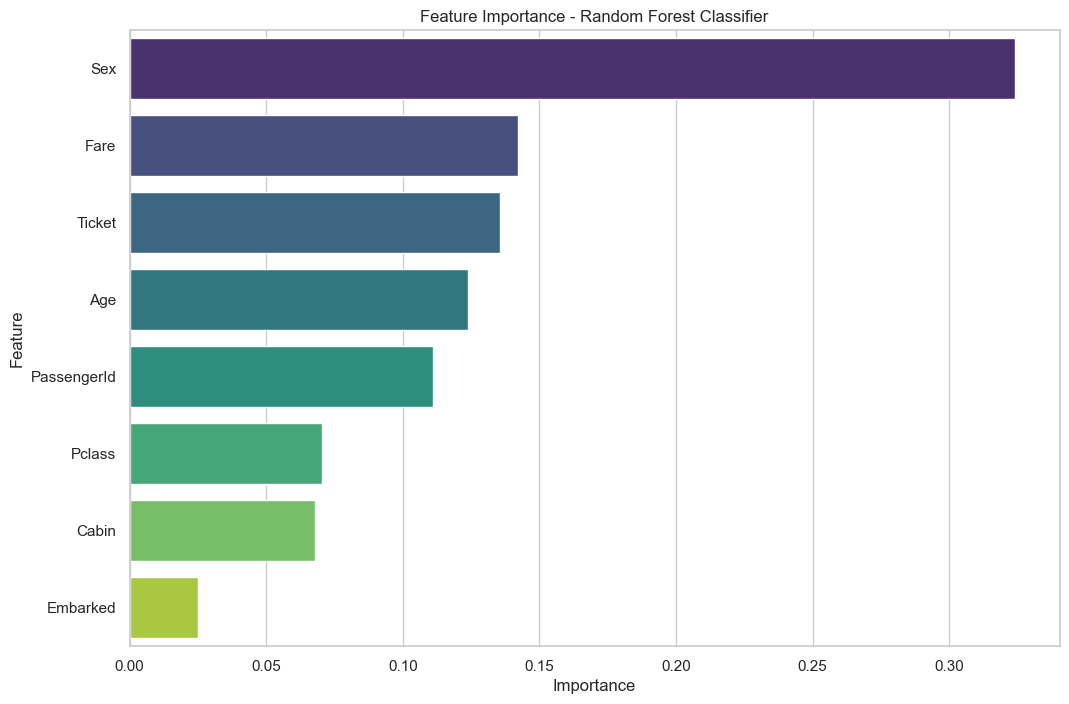

In [71]:
import matplotlib.pyplot as plt

# Getting the best-tuned Random Forest model from the GridSearchCV
best_rf_model = grid_search.best_estimator_

# Getting feature importances
feature_importances = best_rf_model.feature_importances_

# Getting feature names
feature_names = x.columns

# Creating a DataFrame to store feature names and their importances
feature_importance_df = pd.DataFrame({'Feature': feature_names, 'Importance': feature_importances})

# Sorting features based on importance
feature_importance_df = feature_importance_df.sort_values(by='Importance', ascending=False)

# Plotting feature importance using seaborn
plt.figure(figsize=(12, 8))
sns.barplot(x='Importance', y='Feature', data=feature_importance_df, palette='viridis')
plt.xlabel('Importance')
plt.title('Feature Importance - Random Forest Classifier')
plt.show()


# SAVING MODEL

In [77]:
import joblib

# Saving the model to a file
model_filename = 'random_forest_model.joblib'
joblib.dump(best_rf_model, model_filename)

print(f"Model saved as {model_filename}")


Model saved as random_forest_model.joblib


In [79]:
import pickle
# Saving the model using pickle
pickle_filename = 'random_forest_model.pkl'
with open(pickle_filename, 'wb') as pickle_file:
    pickle.dump(best_rf_model, pickle_file)
print(f"Model saved using pickle as {pickle_filename}")

Model saved using pickle as random_forest_model.pkl


In [82]:
# Loading the saved model from the file 'random_forest_model.pkl'
loaded_model = pickle.load(open('random_forest_model.pkl', 'rb'))

# Using the loaded model to make predictions on the test data
accuracy = loaded_model.score(x_test, y_test)

# Printing the accuracy multiplied by 100 for better readability
print(f"Model Accuracy on Test Data: {accuracy * 100:.2f}%")


Model Accuracy on Test Data: 93.90%


In [84]:
import pandas as pd

# Using the loaded model to make predictions on the test data
predictions = loaded_model.predict(x_test)

# Creating a DataFrame with predicted and original labels
conclusion = pd.DataFrame({"PREDICTED": predictions, "ORIGINAL": y_test})

# Displaying the DataFrame
print(conclusion)


     PREDICTED  ORIGINAL
97           0         1
467          0         0
870          0         0
452          0         0
731          0         0
..         ...       ...
232          0         0
483          0         1
828          0         1
565          0         0
773          0         0

[164 rows x 2 columns]


# EVALUATION OF MODEL PERFORMANCE

In [86]:
# Evaluating the model performance
accuracy = loaded_model.score(x_test, y_test)
print(f"Model Accuracy: {accuracy * 100:.2f}%")

Model Accuracy: 93.90%


# CONCLUSION

In [87]:
# Conclusion
print("\nProject Conclusion:")
print("The trained model has been successfully loaded and evaluated on the test data.")
print(f"The model achieved an accuracy of {accuracy * 100:.2f}% on the test set.")
print("Further analysis and insights can be added based on specific project requirements.")


Project Conclusion:
The trained model has been successfully loaded and evaluated on the test data.
The model achieved an accuracy of 93.90% on the test set.
Further analysis and insights can be added based on specific project requirements.
